<a href="https://colab.research.google.com/github/TJ1810/Sentiment-analysis/blob/main/capital_management_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import time
import numpy as np
import pandas as pd
import datetime as dt
import cufflinks as cf
from pylab import mpl, plt

In [ ]:
np.random.seed(1000)
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

<ipython-input-2-56c54275095e>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



capital management

Kelly Criterion in a Binomial Setting

In [ ]:
p = 0.55

In [ ]:
f = p - (1-p)

In [ ]:
f

0.10000000000000009

In [ ]:
I = 50

In [ ]:
n = 100

In [ ]:
def run_simulation(f):
  c = np.zeros((n, I))
  c[0] = 100
  for i in range(I):
    for t in range(1, n):
        o = np.random.binomial(1, p)
        if o > 0:
            c[t, i] = (1 + f) * c[t - 1, i]
        else:
            c[t, i] = (1 - f) * c[t - 1, i]
  return c

In [ ]:
c_1 = run_simulation(f)

In [ ]:
c_1.round(2)

array([[100.  , 100.  , 100.  , ..., 100.  , 100.  , 100.  ],
       [ 90.  , 110.  ,  90.  , ..., 110.  ,  90.  , 110.  ],
       [ 99.  , 121.  ,  99.  , ..., 121.  ,  81.  , 121.  ],
       ...,
       [226.35, 338.13, 413.27, ..., 123.97, 123.97, 123.97],
       [248.99, 371.94, 454.6 , ..., 136.37, 136.37, 136.37],
       [273.89, 409.14, 409.14, ..., 122.73, 150.01, 122.73]])

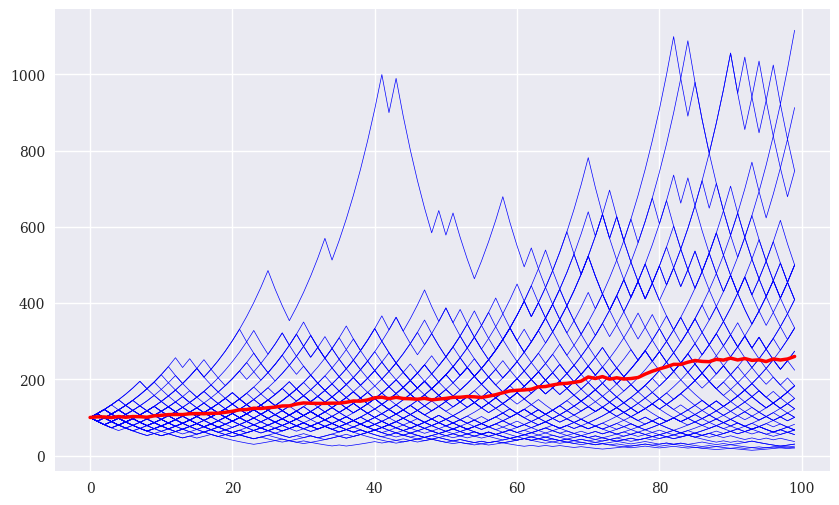

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(c_1, 'b', lw=0.5)
plt.plot(c_1.mean(axis=1), 'r', lw=2.5);

In [ ]:
c_2 = run_simulation(0.05)

In [ ]:
c_3 = run_simulation(0.25)

In [ ]:
c_4 = run_simulation(0.5)

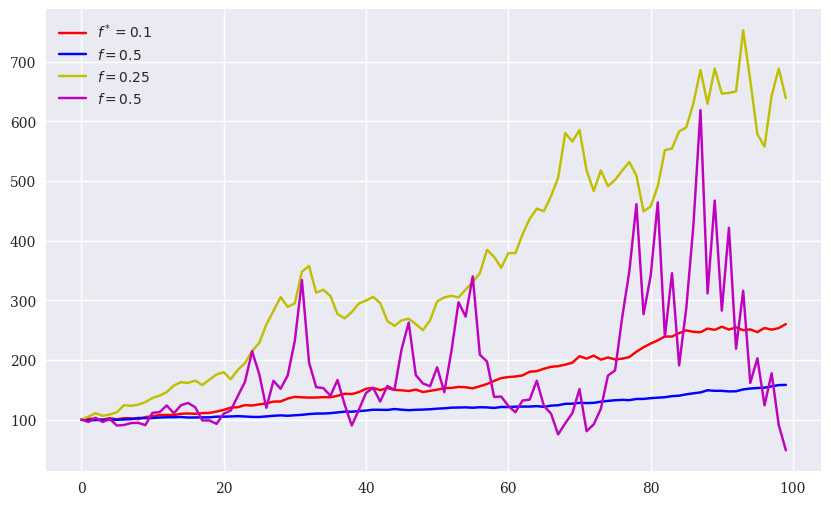

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(c_1.mean(axis=1), 'r', label='$f^*=0.1$')
plt.plot(c_2.mean(axis=1), 'b', label='$f=0.5$')
plt.plot(c_3.mean(axis=1), 'y', label='$f=0.25$')
plt.plot(c_4.mean(axis=1), 'm', label='$f=0.5$')
plt.legend(loc=0);

Kelly Criterion for stocks and indices

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tr_eikon_eod_data (2).csv to tr_eikon_eod_data (2).csv


In [ ]:
raw = pd.read_csv('tr_eikon_eod_data (2).csv', index_col=0, parse_dates=True)

In [ ]:
symbol = '.SPX'

In [ ]:
data = pd.DataFrame(raw[symbol])

In [ ]:
data['returns'] = np.log(data / data.shift(1))

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.head()

,.SPX,returns
Date,,
2010-01-05,1136.52,0.003111
2010-01-06,1137.14,0.000545
2010-01-07,1141.69,0.003993
2010-01-08,1144.98,0.002878
2010-01-11,1146.98,0.001745


In [ ]:
data.tail()

,.SPX,returns
Date,,
2018-06-25,2717.07,-0.013820
2018-06-26,2723.06,0.002202
2018-06-27,2699.63,-0.008642
2018-06-28,2716.31,0.006160
2018-06-29,2718.37,0.000758


In [ ]:
data.describe().round(2)

,.SPX,returns
count,2061.00,2061.00
mean,1802.78,0.00
std,483.35,0.01
min,1022.58,-0.07
25%,1338.35,-0.00
50%,1863.40,0.00
75%,2109.60,0.00
max,2872.87,0.05


In [ ]:
data.mean()

.SPX       1802.783047
returns       0.000393
dtype: float64

In [ ]:
data = (
    pd.DataFrame(data[symbol])
    .dropna()
)

In [ ]:
data.duplicated().sum()

15

In [ ]:
data.columns

Index(['.SPX'], dtype='object')

In [ ]:
data.isna().sum()

.SPX    0
dtype: int64

In [ ]:
data.isnull().values.any()

False

In [ ]:
data['returns'] = np.log(data / data.shift(1))

In [ ]:
mu = data['returns'].mean() * 252

In [ ]:
mu

0.10667936477168821

In [ ]:
sigma = data.returns.std() * 252 ** 0.5

In [ ]:
sigma

0.1500206857623061

In [ ]:
r = 0.0

In [ ]:
f = (mu - r) / sigma ** 2

In [ ]:
f

4.739997671284076

In [ ]:
equs = []

In [ ]:
def kelly_strategy(f):
    global equs
    equ = 'equity_{:.2f}'.format(f)
    equs.append(equ)
    cap = 'capital_{:.2f}'.format(f)
    data[equ] = 1
    data[cap] = data[equ] * f
    for i, t in enumerate(data.index[1:]):
        t_1 = data.index[i]
        data.loc[t, cap] = data[cap].loc[t_1] * \
                            math.exp(data['returns'].loc[t])
        data.loc[t, equ] = data[cap].loc[t] - \
                            data[cap].loc[t_1] + \
                            data[equ].loc[t_1]
        data.loc[t, cap] = data[equ].loc[t] * f


In [ ]:
kelly_strategy(f * 0.5)

In [ ]:
kelly_strategy(f * 0.66)

In [ ]:
kelly_strategy(f)

In [ ]:
print(data[equs].tail())

            equity_2.37  equity_3.13  equity_4.74
Date                                             
2018-06-25     5.834067     8.219795    11.812349
2018-06-26     5.864549     8.276485    11.935785
2018-06-27     5.744958     8.053702    11.448992
2018-06-28     5.829084     8.209373    11.784295
2018-06-29     5.839561     8.228850    11.826656


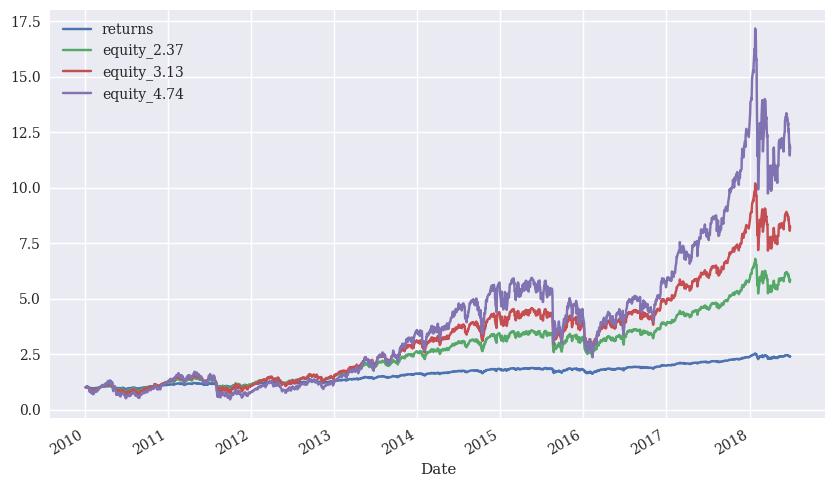

In [ ]:
ax = data['returns'].cumsum().apply(np.exp).plot(legend=True, figsize=(10,6))
data[equs].plot(ax=ax, legend=True);